In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras

###Download datasest

In [2]:
#install to download the dataset easily
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [3]:
#download dataset
!gdown 18wEiRTNkFRp5Xlt1pvtw8q7Me_lENX21

Downloading...
From: https://drive.google.com/uc?id=18wEiRTNkFRp5Xlt1pvtw8q7Me_lENX21
To: /content/Dental.rar
100% 40.1M/40.1M [00:01<00:00, 39.9MB/s]


In [4]:
#unzip dataset
!unrar x "/content/Dental.rar" 


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Dental.rar

Creating    Dental                                                    OK
Creating    Dental/Argon                                              OK
Extracting  Dental/Argon/1252.PNG                                          0%  OK 
Extracting  Dental/Argon/170861378_181773640455697_8868278685022032298_n_03.jpg       0%  OK 
Extracting  Dental/Argon/170997132_181773687122359_801184412197855815_n_03.jpg       0%  OK 
Extracting  Dental/Argon/172042944_181773760455685_5660686353046769448_n_03.jpg       0%  OK 
Extracting  Dental/Argon/2123.PNG                                          0%  OK 
Extracting  Dental/Argon/215339849_1394213794283356_2287391585413002973_n_03.jpg       0%  OK 
Extracting  Dental/Argon/215339849_1394213794283356_2287391585413002973_n_06.jpg       0%  OK 
Extracting  Dental/Argon/215339849_1394213794283

###Explore dataset

(383, 246, 3)


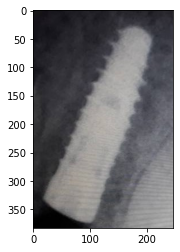

In [5]:
# Read and plot image 
def read_and_display(image):
    image = plt.imread(image)
    plt.imshow(image)
    print(image.shape)
    
read_and_display("/content/Dental/Biomet3i/22406019_1904919493106345_55657782152658233_n.jpg")

In [6]:
source = '/content/Dental'

print("Number of classes = ", len(os.listdir(source)))

Number of classes =  60


In [7]:
#number of images per class
n_images_list = []

for f in os.listdir(source):  
    images = os.listdir(os.path.join(source, f))
    n_images = len(images)
    n_images_list.append(n_images)
    print(f, "--->", n_images)

Isomed ---> 21
osteocare ---> 1
Neoss ---> 38
BRAT ---> 34
bego ---> 7
Neobiotech ---> 39
Dentis ---> 81
Argon ---> 43
Ritter ---> 50
Vitronex ---> 58
ROOTT ---> 49
Straumann ---> 50
Root ---> 14
C-tech ---> 39
JDentalCare ---> 37
Megagen ---> 39
Dentaurum ---> 6
Nuvo ---> 5
Hiossen ---> 85
Nucleoss ---> 38
Shutz ---> 33
Bilimplant ---> 63
BioHorizons ---> 71
SIC ---> 55
BTK ---> 41
mode ---> 2
DTI ---> 23
Astratech ---> 30
ETK ---> 94
Dentegris ---> 24
TUT ---> 34
FMD ---> 6
NDI ---> 29
B&B Dental ---> 41
Zimmer ---> 45
Medibrex ---> 13
Blue Sky Bio ---> 40
Implant-Direct ---> 3
Green ---> 58
Klockner ---> 11
Humana ---> 3
Biomet3i ---> 47
Bredent ---> 31
PTI ---> 68
biodem ---> 38
Detech ---> 86
Oxy ---> 2
Dual ---> 25
Humantech ---> 38
BioInfinity Implant ---> 40
Neodent ---> 8
General ---> 21
solvo ---> 45
Dentium ---> 37
Flotechno ---> 60
Bicon ---> 149
Medisolaris ---> 19
Chaoram ---> 127
SGS ---> 68
Calcitach ---> 1


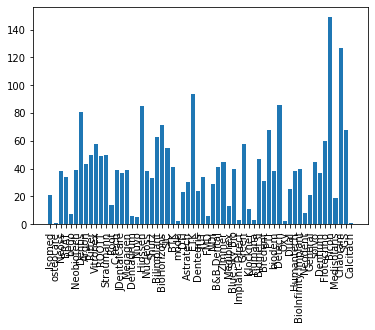

In [8]:
plt.bar(os.listdir(source),n_images_list)
plt.xticks(rotation=90)
plt.show()

In [9]:
import shutil
source = '/content/Dental'
n_images_list = []

for f in os.listdir(source):  
    images = os.listdir(os.path.join(source, f))
    n_images = len(images)
    if n_images < 25: 
        n_images_list.append(n_images)
        shutil.rmtree(os.path.join(source, f), ignore_errors=True)
    else:
      n_images_list.append(n_images)

print("Number of classes after del = ", len(os.listdir(source)))

Number of classes after del =  41


In [10]:
classes_list = os.listdir(source)
print(classes_list)
num_classes = len(classes_list)

['Neoss', 'BRAT', 'Neobiotech', 'Dentis', 'Argon', 'Ritter', 'Vitronex', 'ROOTT', 'Straumann', 'C-tech', 'JDentalCare', 'Megagen', 'Hiossen', 'Nucleoss', 'Shutz', 'Bilimplant', 'BioHorizons', 'SIC', 'BTK', 'Astratech', 'ETK', 'TUT', 'NDI', 'B&B Dental', 'Zimmer', 'Blue Sky Bio', 'Green', 'Biomet3i', 'Bredent', 'PTI', 'biodem', 'Detech', 'Dual', 'Humantech', 'BioInfinity Implant', 'solvo', 'Dentium', 'Flotechno', 'Bicon', 'Chaoram', 'SGS']


### Train/valid/test split

In [11]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import splitfolders
# Split with a ratio.
splitfolders.ratio("/content/Dental", output="/content/data", 
                   seed=816, ratio=(.85, .075, .075), 
                   group_prefix=None)

Copying files: 2173 files [00:00, 3100.97 files/s]


### Create dataset generator

In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=45,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')  

In [6]:
batch_size = 64
img_height = 224
img_width = 224
image_size = (img_height, img_width)

In [7]:
test_dir = '/content/data/test'
test_generator=datagen.flow_from_directory(
                            directory=test_dir,
                            batch_size=1,
                            seed=42,
                            shuffle=False,
                            class_mode="categorical",
                            color_mode="rgb",
                            target_size=image_size)

Found 201 images belonging to 41 classes.


##Ensemble models

###Resnet and Alexnet ensemble models

In [11]:
from keras.models import load_model
resnet_model = load_model('/content/resnet_weights_t4.h5')
alexnet_model = load_model('/content/alexnet_weights.h5') 

In [16]:
resnet_prediction = resnet_model.predict(test_generator)
alexnet_prediction = alexnet_model.predict(test_generator)

201/201 [==============================] - 14s 67ms/step


In [23]:
from sklearn.metrics import accuracy_score

y_test = test_generator.labels
preds = [resnet_prediction, alexnet_prediction]
preds=np.array(preds)
summed = np.sum(preds, axis=0)
ensemble_prediction = np.argmax(summed, axis=1)

In [24]:
resnet_prediction1 = np.argmax(resnet_prediction, axis=1)
alexnet_prediction2 = np.argmax(alexnet_prediction, axis=1)

accuracy1 = accuracy_score(y_test, resnet_prediction1)
accuracy2 = accuracy_score(y_test, alexnet_prediction2)
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

print('Accuracy Score for resnet model = ', accuracy1)
print('Accuracy Score for alexnet model = ', accuracy2)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for resnet model =  0.04975124378109453
Accuracy Score for alexnet model =  0.029850746268656716
Accuracy Score for average ensemble =  0.04477611940298507
